In [1]:
%config IPCompleter.use_jedi = False
import pandas as pd
import warnings 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from pathlib import Path

In [2]:
proj_path = Path().resolve().parent
print(proj_path)

/Users/renyuyang/repo/pyproject/binpacking-expe-ICDCS22-paper/data


In [3]:
FONT_NAME = 'Arial'
FONT_SIZE = 19
import matplotlib as mpl
mpl.rc('font',family='Arial')

In [4]:
file_2d = proj_path / "results/density2D_64_128.csv" 
file_ts = proj_path / "results/densityTS_64_128.csv"
file_large = proj_path / "results/large2D_64_128.csv"
file_large_refine = proj_path / "results/large2D_refine_64_128.csv"
file_largeTS = proj_path / "results/largeTS_64_128.csv"
#file_scalabilityTS = proj_path / "results/scalabilityTS_64_128.csv"

In [5]:
df_2d_column_names = ['FF', 
        'FFD-Avg', 'FFD-Max', 'FFD-AvgExpo', 'FFD-Surrogate', 'FFD-ExtendedSum',
        'BFD-Avg', 'BFD-Max', 'BFD-AvgExpo', 'BFD-Surrogate', 'BFD-ExtendedSum',
        'WFD-Avg', 'WFD-Max', 'WFD-AvgExpo', 'WFD-Surrogate', 'WFD-ExtendedSum',
        'NCD-L2Norm', 'NCD-DotProduct', 'NCD-DotDivision',
        'RefineWFD-Avg-5', 'RefineWFD-Avg-3', 'RefineWFD-Avg-2',
        'SpreadWFD-Avg', 'SpreadWFD-Max', 'SpreadWFD-Surrogate',
        'FFD-Degree', 'NodeCount', 'NCD-Fitness',
       ]

df_2d_column_names_small = ['FF', 'BFD-Avg', 'WFD-AvgExpo', 'NCD-DotProduct', 
                            'RefineWFD-Avg-2', #'RefineWFD-Avg-5', 'RefineWFD-Avg-3', 'RefineWFD-Avg-2',
                            'SpreadWFD-Avg',
                            'FFD-Degree', 'NodeCount', 'NCD-Fitness',
                           ]
df_2d_large_column_names = ['FF', 'BFD-Avg', 'WFD-AvgExpo', 'NCD-DotProduct', 
                            #'RefineWFD-Avg-5', 'RefineWFD-Avg-3', 'RefineWFD-Avg-2',
                            'SpreadWFD-Avg',
                            'FFD-Degree', 'NCD-Fitness',
                           ]
df_2d_large_refine_column_names = ['RefineWFD-Avg-2']
df_2d_large_total_column_names = ['FF', 'BFD-Avg', 'WFD-AvgExpo', 'NCD-DotProduct', 
                            'RefineWFD-Avg-2', #'RefineWFD-Avg-5', 'RefineWFD-Avg-3', 'RefineWFD-Avg-2',
                            'SpreadWFD-Avg',
                            'FFD-Degree', 'NCD-Fitness',
                           ]

df_ts_column_names = ['FF', 'BFD-Avg', 'WFD-AvgExpo', 'SpreadWFD-Avg', 'FFD-Degree']

df_ts_large_column_names = ['FF', 'BFD-Avg', 'WFD-AvgExpo', 'FFD-Degree']

#df_scalab_column_names = ['FF', 'FFD-Avg', 'BFD-Avg', 'FFD-Degree']


classes = ['arbitrary'] #, 'normal', 'threshold']

rename_dict = {
    "FFD-Degree": "Medea-TP",
    "NodeCount": "Medea-NC",
    "NCD-Fitness": "LRASched-Fitness",
    "NCD-DotDivision": "NCD-TightFill",
    "FFD-AvgExpo": "FFD-AvgExp",
    "BFD-AvgExpo": "BFD-AvgExp",
    "WFD-AvgExpo": "WFD-AvgExp",
    "SpreadWFD-Avg": "SpreadWFD-Avg-BinSearch",
    "RefineWFD-Avg-2": "SpreadWFD-Avg-Decr2",
}

In [6]:
## sub_df = any one in df_2d, df_ts, df_large
def get_exp_results(sub_df, alg_column_names):
    sub_df['class'] = sub_df['instance_name'].apply(lambda x: x.split('_')[0])
    sub_df['idx'] = sub_df['instance_name'].apply(lambda x: int(x.split('_')[2]))
    sub_df['density'] = sub_df['instance_name'].apply(lambda x: int(x.split('_')[1][1:]))
    
    for i in alg_column_names:
        sub_df[i + '_eps'] = (round(sub_df[i]/sub_df['LB'] - 1, 3))*100 # *100 to get percentage value
        sub_df[i + '_time'] = sub_df[i + '_time'].apply(lambda x: round(x, 4))

    epsilon_column_names = [i + '_eps' for i in alg_column_names]
    time_column_names = [i + '_time' for i in alg_column_names]
    sub_df_grouped_avg = sub_df.groupby(by = ['class', 'density'], as_index=False).mean()
    eps_df = sub_df_grouped_avg[['class', 'density'] + epsilon_column_names]
    time_df = sub_df_grouped_avg[['class', 'density'] + time_column_names]
    return eps_df, time_df

In [7]:
## sub_df = any one in df_2d, df_ts, df_large
def get_scale_exp_results(sub_df, alg_column_names):
    sub_df['class'] = sub_df['instance_name'].apply(lambda x: x.split('_')[3])
    sub_df['LRAnum'] = sub_df['instance_name'].apply(lambda x: int(x.split('_')[2]))
    sub_df['idx'] = sub_df['instance_name'].apply(lambda x: int(x.split('_')[-1]))
    
    for i in alg_column_names:
        sub_df[i + '_eps'] = (round(sub_df[i]/sub_df['LB'] - 1, 3))*100 # *100 to get percentage value
        sub_df[i + '_time'] = sub_df[i + '_time'].apply(lambda x: round(x, 4))

    epsilon_column_names = [i + '_eps' for i in alg_column_names]
    time_column_names = [i + '_time' for i in alg_column_names]
    sub_df_grouped_avg = sub_df.groupby(by = ['class', 'LRAnum'], as_index=False).mean()
    sub_df_grouped_avg_eps = sub_df_grouped_avg[['class', 'LRAnum'] + epsilon_column_names]
    sub_df_grouped_avg_time = sub_df_grouped_avg[['class', 'LRAnum'] + time_column_names]
    return sub_df_grouped_avg_eps, sub_df_grouped_avg_time

In [8]:
def plot_barchart(original_df, class_name, cols, xlabel, ylabel, legend_args={'loc':'upper center', 'anchor_x':0.5, 'anchor_y':-0.25, 'ncol':5, 'fontsize':FONT_SIZE}, log_scale=False):
    tmp_df = original_df[original_df['class'] == class_name][cols]
    tmp_df.rename(columns=rename_dict, errors='ignore', inplace=True)
    # group of densities/scale
    width = 0.09
    labels = original_df.density.apply(lambda x: f'{x:,}').unique()
    x = np.arange(len(labels))

    fig = plt.figure(figsize=(16, 6.5))
    algs = list(tmp_df.T.index)
    alg_num = len(tmp_df.T)
    alg_res = tmp_df.T.values

    width_class = width * alg_num + 0.15
    #width = 0.95/float(alg_num) # 0.06
    
    curr = alg_num/2.0 + 0.5 #int(alg_num/2)+1
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*',
               '/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-',
               '//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**']

    for i in range(alg_num):
        curr = curr - 1
        plt.bar(x*width_class - width*curr, alg_res[i], width, hatch = hatches[i], alpha=.99)
    
    plt.xticks(x*width_class, labels, fontsize=FONT_SIZE+1, fontweight='bold')
    plt.yticks(fontsize=FONT_SIZE+1, fontweight='bold')
    # plt.axhline(1.17*max([max(alg_res[i]) for i in range(alg_num)]), linewidth=0)
    #plt.title((class_name.capitalize() + " graphs"), fontsize=FONT_SIZE, fontname=FONT_NAME)
    plt.xlabel(xlabel, fontname=FONT_NAME, fontsize=FONT_SIZE+2.5, fontweight='bold')
    plt.ylabel(ylabel, fontname=FONT_NAME, fontsize=FONT_SIZE+2.5, fontweight='bold')
    if log_scale:
        plt.yscale('log')
    plt.legend(algs, loc=legend_args['loc'], bbox_to_anchor=(legend_args['anchor_x'], legend_args['anchor_y']), ncol=legend_args['ncol'], fontsize=legend_args['fontsize'])
    plt.tight_layout()
    plt.show()
    fig.tight_layout()
    return fig


# Result-1: 2D Fixed Res Request

## 1.1 Impact of Affinity Density On Effectiveness and Time Consumption

In [9]:
df_2d = pd.read_csv(file_2d, sep='\t')
twodim_eps, twodim_time = get_exp_results(df_2d, df_2d_column_names)
twodim_eps.columns = ['class', 'density'] + df_2d_column_names
twodim_time.columns = ['class', 'density'] + df_2d_column_names

#### The algorithm effectivenss and time consumption of the three different classes 

In [10]:
twodim_eps

,class,density,FF,FFD-Avg,FFD-Max,FFD-AvgExpo,FFD-Surrogate,FFD-ExtendedSum,BFD-Avg,BFD-Max,...,NCD-DotDivision,RefineWFD-Avg-5,RefineWFD-Avg-3,RefineWFD-Avg-2,SpreadWFD-Avg,SpreadWFD-Max,SpreadWFD-Surrogate,FFD-Degree,NodeCount,NCD-Fitness
0,arbitrary,1,12.22,12.22,12.22,12.22,12.22,15.55,12.22,12.22,...,11.64,7.22,5.92,5.21,4.47,4.47,4.47,12.20,12.24,11.64
1,arbitrary,5,12.16,12.16,12.16,12.16,12.16,15.52,12.16,12.16,...,11.47,7.16,6.46,5.34,4.39,4.39,4.39,12.29,12.61,11.47
2,arbitrary,10,12.06,12.06,12.06,12.06,12.06,15.61,12.06,12.06,...,11.38,7.03,6.03,5.63,4.64,4.64,4.64,12.09,12.93,11.38
3,normal,1,12.21,12.21,12.21,12.21,12.21,15.57,12.21,12.21,...,11.57,7.21,6.21,4.80,4.21,4.21,4.21,12.21,12.20,11.57
4,normal,5,12.14,12.14,12.14,12.14,12.14,15.58,12.14,12.14,...,11.66,7.13,6.13,5.72,4.54,4.54,4.54,12.11,12.34,11.66
5,normal,10,12.03,12.03,12.03,12.03,12.03,15.62,12.03,12.03,...,11.43,7.02,6.32,5.21,4.32,4.32,4.32,12.00,12.21,11.43
6,threshold,1,12.18,12.18,12.18,12.18,12.18,15.57,12.18,12.18,...,11.58,7.18,6.18,4.37,3.64,3.64,3.64,12.33,12.35,11.58
7,threshold,5,12.09,12.09,12.09,12.09,12.09,15.77,12.09,12.09,...,11.51,8.58,7.28,6.88,6.10,6.10,6.10,12.17,12.25,11.51
8,threshold,10,11.93,11.93,11.93,11.93,11.93,16.05,11.93,11.93,...,11.37,11.93,10.72,10.52,9.68,9.68,9.68,12.12,12.12,11.37


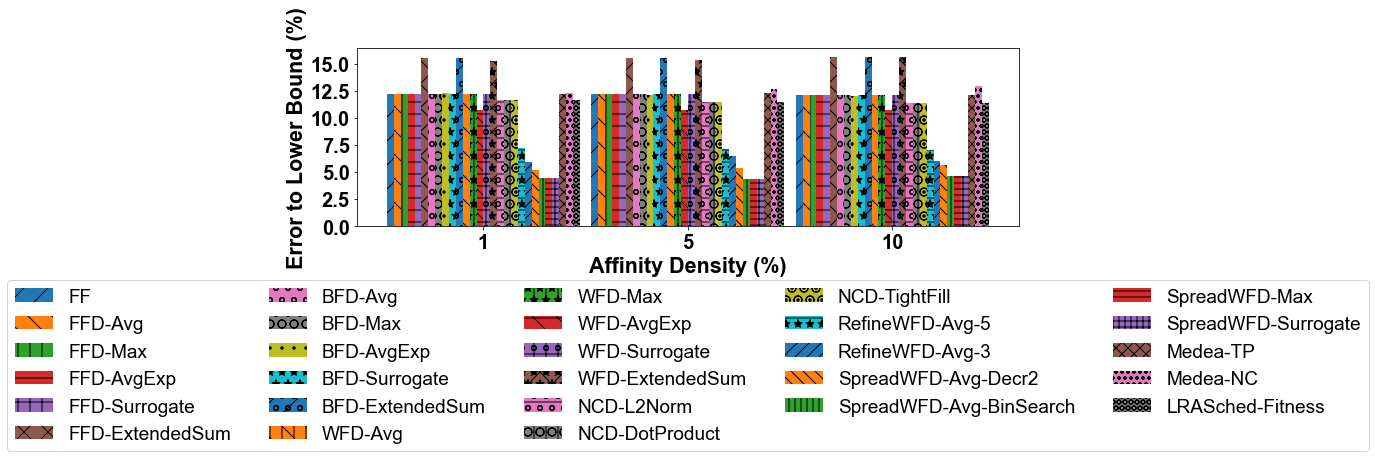

In [11]:
for c in classes:
    legend_args={'loc':'upper center', 'anchor_x':0.5, 'anchor_y':-0.25, 'ncol':5, 'fontsize':FONT_SIZE}
    fig = plot_barchart(twodim_eps, c, df_2d_column_names, "Affinity Density (%)", 'Error to Lower Bound (%)', legend_args)
    filename = f"{proj_path}/plots/density2D_result_{c}.pdf" 
    #fig.savefig(filename)

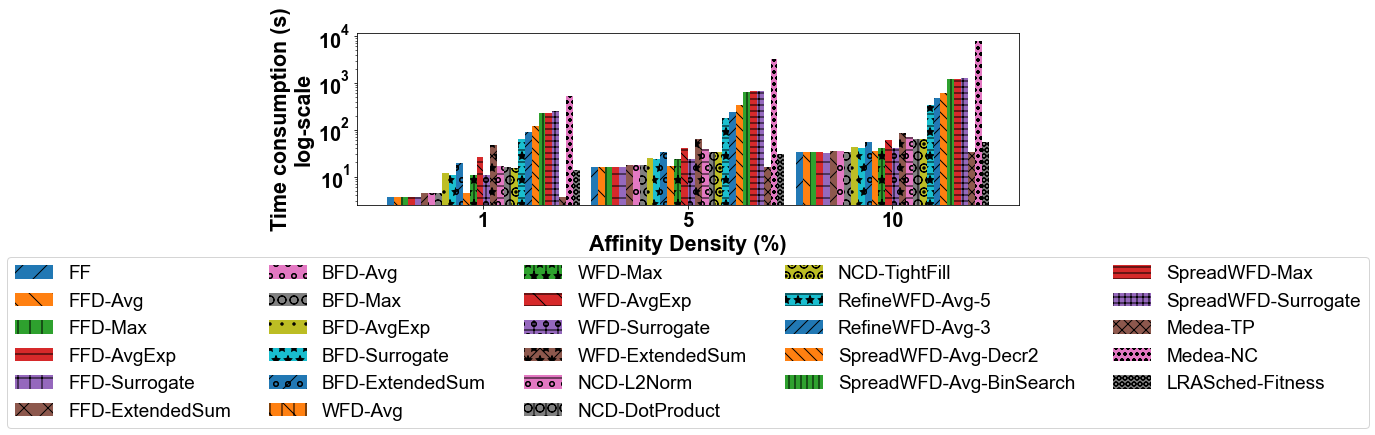

In [12]:
for c in classes: 
    legend_args={'loc':'upper center', 'anchor_x':0.5, 'anchor_y':-0.25, 'ncol':5, 'fontsize':FONT_SIZE}
    fig = plot_barchart(twodim_time, c, df_2d_column_names,
                        "Affinity Density (%)",
                        'Time consumption (s)\nlog-scale', legend_args, True)
#    filename = f"{proj_path}/plots/density2D_time_{c}.pdf" 
    #fig.savefig(filename)

In [13]:
twodim_time

,class,density,FF,FFD-Avg,FFD-Max,FFD-AvgExpo,FFD-Surrogate,FFD-ExtendedSum,BFD-Avg,BFD-Max,...,NCD-DotDivision,RefineWFD-Avg-5,RefineWFD-Avg-3,RefineWFD-Avg-2,SpreadWFD-Avg,SpreadWFD-Max,SpreadWFD-Surrogate,FFD-Degree,NodeCount,NCD-Fitness
0,arbitrary,1,3.7,3.7,3.7,3.7,3.7,4.5,4.5,4.5,...,15.6,64.1,89.7,121.2,225.4,226.0,248.9,3.7,512.1,13.7
1,arbitrary,5,16.4,16.2,16.2,15.9,15.8,17.4,17.3,17.4,...,33.8,181.0,240.0,340.3,652.8,657.0,673.8,16.2,3200.1,30.3
2,arbitrary,10,32.8,33.2,32.9,32.8,32.4,35.4,34.4,34.1,...,62.1,344.6,472.9,622.2,1214.6,1216.7,1245.5,32.8,8004.9,55.6
3,normal,1,3.7,3.7,3.7,3.7,3.6,4.5,4.5,4.6,...,15.3,64.9,87.4,126.1,233.6,232.9,264.9,3.6,465.5,13.4
4,normal,5,16.6,16.7,16.7,16.3,16.3,17.9,17.6,17.5,...,34.3,200.2,272.2,361.8,684.2,686.5,715.3,16.5,2674.6,30.9
5,normal,10,30.4,30.8,30.5,30.5,29.8,32.3,31.3,30.9,...,56.2,351.6,468.5,657.5,1146.4,1137.4,1149.4,30.0,6490.9,49.7
6,threshold,1,3.0,3.0,3.0,3.0,3.0,3.7,3.8,3.8,...,12.7,59.0,79.9,118.4,213.7,214.6,240.7,4.4,137.8,11.6
7,threshold,5,15.3,15.4,15.4,15.3,15.4,16.3,16.3,16.3,...,30.0,196.6,266.1,339.4,780.1,777.4,807.1,31.1,1394.0,27.8
8,threshold,10,29.8,29.7,29.7,29.6,29.7,31.3,30.7,30.8,...,50.1,302.3,364.9,412.9,1353.1,1359.4,1386.7,85.8,4929.5,46.3


### Same plots with subset of columns

In [14]:
twodim_eps_small = twodim_eps[['class', 'density'] +df_2d_column_names_small]
twodim_time_small = twodim_time[['class', 'density'] +df_2d_column_names_small]

In [15]:
twodim_eps_small

,class,density,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,RefineWFD-Avg-2,SpreadWFD-Avg,FFD-Degree,NodeCount,NCD-Fitness
0,arbitrary,1,12.22,12.22,10.75,11.64,5.21,4.47,12.20,12.24,11.64
1,arbitrary,5,12.16,12.16,10.68,11.47,5.34,4.39,12.29,12.61,11.47
2,arbitrary,10,12.06,12.06,10.71,11.38,5.63,4.64,12.09,12.93,11.38
3,normal,1,12.21,12.21,10.78,11.57,4.80,4.21,12.21,12.20,11.57
4,normal,5,12.14,12.14,10.70,11.66,5.72,4.54,12.11,12.34,11.66
5,normal,10,12.03,12.03,10.67,11.43,5.21,4.32,12.00,12.21,11.43
6,threshold,1,12.18,12.18,10.74,11.58,4.37,3.64,12.33,12.35,11.58
7,threshold,5,12.09,12.09,10.65,11.51,6.88,6.10,12.17,12.25,11.51
8,threshold,10,11.93,11.93,10.60,11.37,10.52,9.68,12.12,12.12,11.37


In [16]:
twodim_eps_small.mean()

/var/folders/9p/y1zkb7yx02v6q97sf_2f80n40000gn/T/ipykernel_3025/2233098044.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  twodim_eps_small.mean()


density             5.333333
FF                 12.113333
BFD-Avg            12.113333
WFD-AvgExpo        10.697778
NCD-DotProduct     11.512222
RefineWFD-Avg-2     5.964444
SpreadWFD-Avg       5.110000
FFD-Degree         12.168889
NodeCount          12.361111
NCD-Fitness        11.512222
dtype: float64

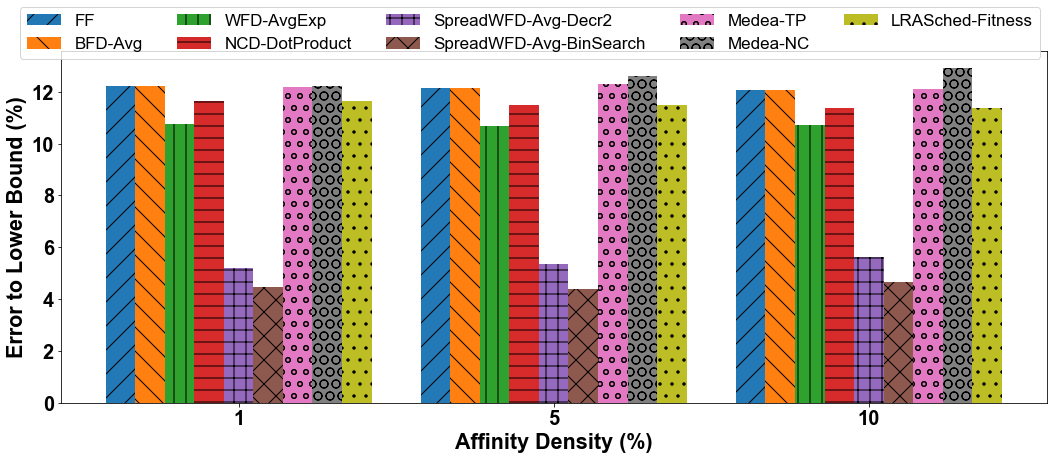

In [62]:
for c in classes: 
# c = "arbitrary"
    legend_args={'loc':'upper left', 'anchor_x':-0.05, 'anchor_y':1.15, 'ncol':5, 'fontsize':FONT_SIZE-2}
    fig = plot_barchart(twodim_eps, c, df_2d_column_names_small, "Affinity Density (%)", 'Error to Lower Bound (%)',legend_args)
    filename = f"{proj_path}/plots/density2D_small2_result_{c}.pdf" 
    fig.savefig(filename)

In [18]:
twodim_time_small

,class,density,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,RefineWFD-Avg-2,SpreadWFD-Avg,FFD-Degree,NodeCount,NCD-Fitness
0,arbitrary,1,3.7,4.5,26.3,15.8,121.2,225.4,3.7,512.1,13.7
1,arbitrary,5,16.4,17.3,41.4,34.1,340.3,652.8,16.2,3200.1,30.3
2,arbitrary,10,32.8,34.4,61.1,62.2,622.2,1214.6,32.8,8004.9,55.6
3,normal,1,3.7,4.5,26.0,15.4,126.1,233.6,3.6,465.5,13.4
4,normal,5,16.6,17.6,42.0,34.5,361.8,684.2,16.5,2674.6,30.9
5,normal,10,30.4,31.3,55.4,54.3,657.5,1146.4,30.0,6490.9,49.7
6,threshold,1,3.0,3.8,23.3,12.7,118.4,213.7,4.4,137.8,11.6
7,threshold,5,15.3,16.3,38.5,30.3,339.4,780.1,31.1,1394.0,27.8
8,threshold,10,29.8,30.7,55.1,49.4,412.9,1353.1,85.8,4929.5,46.3


In [19]:
(8004.9+6490.9+4929.5)/3

6475.099999999999

In [20]:
twodim_time_small.groupby("density").mean()

,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,RefineWFD-Avg-2,SpreadWFD-Avg,FFD-Degree,NodeCount,NCD-Fitness
density,,,,,,,,,
1,3.466667,4.266667,25.200000,14.633333,121.900000,224.233333,3.900000,371.8,12.900000
5,16.100000,17.066667,40.633333,32.966667,347.166667,705.700000,21.266667,2422.9,29.666667
10,31.000000,32.133333,57.200000,55.300000,564.200000,1238.033333,49.533333,6475.1,50.533333


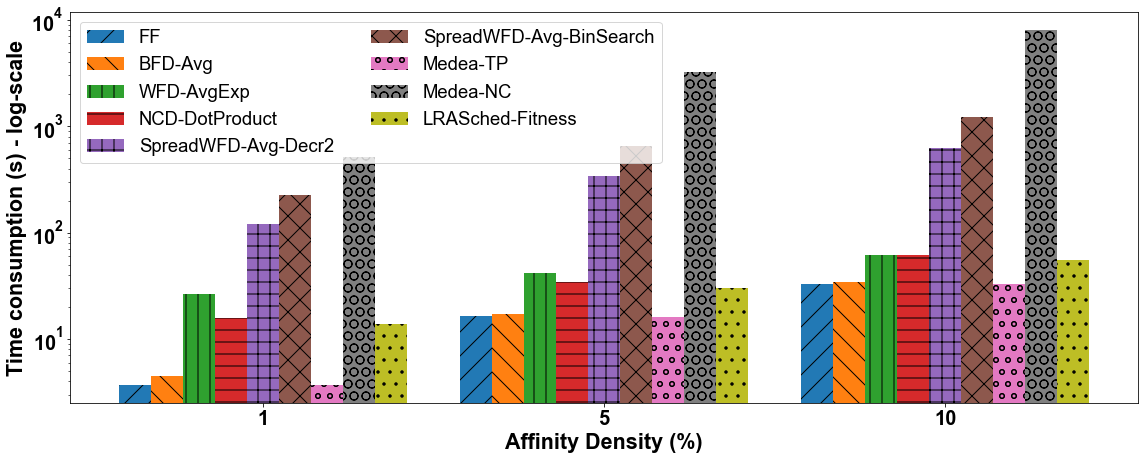

In [52]:
for c in classes: 
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':2, 'fontsize':FONT_SIZE-0.5}
    fig = plot_barchart(twodim_time, c, df_2d_column_names_small, "Affinity Density (%)", 'Time consumption (s) - log-scale', legend_args, True)
    filename = f"{proj_path}/plots/density2D_small2_time_{c}.pdf" 
    fig.tight_layout()
    fig.savefig(filename)


### Test summary plot

Time FF                          17.633333
BFD-Avg                     18.733333
WFD-AvgExp                  42.933333
NCD-DotProduct              37.366667
SpreadWFD-Avg-Decr2        361.233333
SpreadWFD-Avg-BinSearch    697.600000
Medea-TP                    17.566667
LRASched-Fitness            33.200000
dtype: float64
Efficiency FF                         12.146667
BFD-Avg                    12.146667
WFD-AvgExp                 10.713333
NCD-DotProduct             11.496667
SpreadWFD-Avg-Decr2         5.393333
SpreadWFD-Avg-BinSearch     4.500000
Medea-TP                   12.193333
LRASched-Fitness           11.496667
dtype: float64
['FF', 'BFD-Avg', 'WFD-AvgExp', 'NCD-DotProduct', 'SpreadWFD-Avg-Decr2', 'SpreadWFD-Avg-BinSearch', 'Medea-TP', 'LRASched-Fitness']


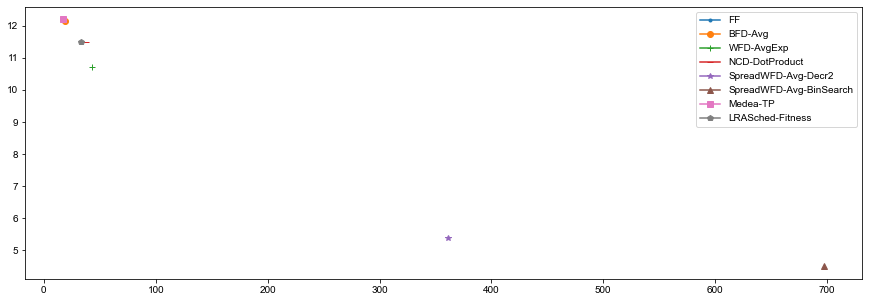

In [22]:
def plot_summary(df_result, df_time, class_name, cols, xlabel, ylabel, log_scale=False):
    df_result = df_result[df_result['class'] == class_name][cols]
    df_result.rename(columns=rename_dict, errors='ignore', inplace=True)
    df_time = df_time[df_time['class'] == class_name][cols]
    df_time.rename(columns=rename_dict, errors='ignore', inplace=True)
    
    df_result.drop('Medea-NC', axis=1, inplace=True)
    df_time.drop('Medea-NC', axis=1, inplace=True)
    
    x = df_time.mean()
    y = df_result.mean()
    
    print("Time", x)
    print("Efficiency", y)
    
    markers = ['.', 'o', '+', '_', '*', '^', 's', 'p', 'x', '|', 'd', '1', '2', '3', '4']
    
    fig = plt.figure(figsize=(15,5))
    algs = list(df_result.T.index)
    #algs.remove('Medea-NC')
    print(algs)
    alg_num = len(algs)
    
    
    
    
    for i in range(alg_num):
        plt.plot(x[i], y[i], marker=markers[i])
    #plt.plot(x, y, 'o')
    
    plt.legend(algs)
    if log_scale:
        plt.xscale('log')
    plt.show()
    return fig
    
fig = plot_summary(twodim_eps_small, twodim_time_small, 'arbitrary', df_2d_column_names_small, "time", "effectiveness", False)
filename = f"{proj_path}/plots/summary_arbitrary.pdf" 
fig.savefig(filename)

### Plot effectiveness and time in one figure

In [23]:
#for c in classes: 
#    #c = "arbitrary"
#    fig = plot_barchart(twodim_time, c, time_cols_without_nodecount, "Affinity Density (%)", 'Time Consumption (s)')

#    filename = f"{proj_path}/plots/density2D_time_{c}.pdf"
#    fig.savefig(filename)

In [24]:
def plot_one(original_df, class_name, cols, ax, labels, xlabel, ylabel, log_scale=False):
    tmp_df = original_df[original_df['class'] == class_name][cols]
    tmp_df.rename(columns=rename_dict, errors='ignore', inplace=True)
    # group of densities/scale
    width = 0.056
    # labels = original_df.density.apply(lambda x: f'{x:,}').unique()
    ind = np.arange(len(labels))

    alg_num = len(tmp_df.T)
    alg_res = tmp_df.T.values
    alg_names = tmp_df.columns.tolist()

    width_class = width * (alg_num + 2)
    #width = 0.95/float(alg_num) # 0.06

    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*',
                '/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

    for i in range(alg_num):
        if alg_num == 15 and i == 14: # to mute Medea-NC
            ax.bar(ind*width_class, 0, 0)
        ax.bar(ind + i*width - width_class/2,
                alg_res[i], width, hatch=hatches[i], alpha=.99, label=alg_names[i])

    ax.set_xticks(ind)
    ax.set_xticklabels(labels, fontsize=FONT_SIZE*.9)
    ax.set_ylabel(ylabel, fontsize=FONT_SIZE*.9)
    if log_scale:
        ax.set_yscale('log')

In [25]:
def plot_barchart_density2D_result_time(data0, data1, filepath):
    labels = ['low density (1%)', 'medium density (5%)',
              'high density (10%)']

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=False, sharey=False)

    plot_one(*data0, axs[0], labels, "Affinity Density",
             'Deviation from Lower Bound (%)')
    plot_one(*data1, axs[1], labels, "Affinity Density",
             'Time Consumption (sec)')

    axs[0].set_yticks(np.arange(0, 20, step=4))
    axs[1].set_yticks(np.arange(0, 80, step=20))
    axs[0].set_yticklabels(np.arange(0, 20, step=4), fontsize=FONT_SIZE)
    axs[1].set_yticklabels(np.arange(0, 80, step=20), fontsize=FONT_SIZE)

    axs[0].set_title(
        '(a) Effectiveness of Different Affinity Densities', fontsize=FONT_SIZE*1.15, y=-.4)
    axs[1].set_title(
        '(b) Time Consumption of Different Affinity Densities', fontsize=FONT_SIZE*1.15, y=-.4)

    fig.legend(
        *(axs[0].get_legend_handles_labels()),
        bbox_to_anchor=(0.5, 1.09),
        loc='upper center',  ncol=4,
        fontsize=FONT_SIZE*0.75, frameon=True)

    plt.subplots_adjust(hspace=0.5)
    plt.savefig(filepath, bbox_inches='tight')


c = "arbitrary"
filename = f"{proj_path}/plots/density2D_result_time_{c}.pdf"
#plot_barchart_density2D_result_time(
#    (twodim_eps, c, df_2d_column_names),
#    (twodim_time, c, time_cols_without_nodecount),
#    filename)

## 1.2 Impact of LRA Submission Scale on Effectiveness and Time Consumption 

In [26]:
df_large = pd.read_csv(file_large, sep='\t') ## df_2d_large

twodim_eps_scale, twodim_time_scale = get_scale_exp_results(df_large, df_2d_large_column_names)
twodim_eps_scale.columns = ['class', 'density'] + df_2d_large_column_names
twodim_time_scale.columns = ['class', 'density'] + df_2d_large_column_names

In [27]:
# Include another csv file with only refineWFD algos
df_large_refine = pd.read_csv(file_large_refine, sep='\t') ## df_2d_large

twodim_eps_scale_ref, twodim_time_scale_ref = get_scale_exp_results(df_large_refine, df_2d_large_refine_column_names)
twodim_eps_scale_ref.columns = ['class', 'density'] + df_2d_large_refine_column_names
twodim_time_scale_ref.columns = ['class', 'density'] + df_2d_large_refine_column_names

In [28]:
twodim_eps_scale = twodim_eps_scale.merge(twodim_eps_scale_ref)
twodim_time_scale = twodim_time_scale.merge(twodim_time_scale_ref)

In [29]:
twodim_eps_scale.sort_values(by='density')

,class,density,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,SpreadWFD-Avg,FFD-Degree,NCD-Fitness,RefineWFD-Avg-2
0,arbitrary,10000,2.70,2.70,2.28,2.60,3.01,2.74,2.60,4.72
3,normal,10000,2.70,2.70,2.27,2.61,2.10,2.75,2.61,3.50
6,threshold,10000,2.69,2.69,2.28,2.62,0.46,2.71,2.62,1.46
1,arbitrary,50000,2.43,2.43,1.95,2.34,0.56,2.41,2.34,1.64
4,normal,50000,2.44,2.44,1.94,2.35,0.57,2.42,2.35,1.66
7,threshold,50000,2.42,2.42,1.95,2.36,0.16,2.43,2.36,0.84
2,arbitrary,100000,2.40,2.40,1.93,2.32,0.31,2.40,2.32,0.84
5,normal,100000,2.39,2.39,1.91,2.32,0.25,2.40,2.32,0.42
8,threshold,100000,2.41,2.41,1.91,2.35,0.16,2.40,2.35,0.46


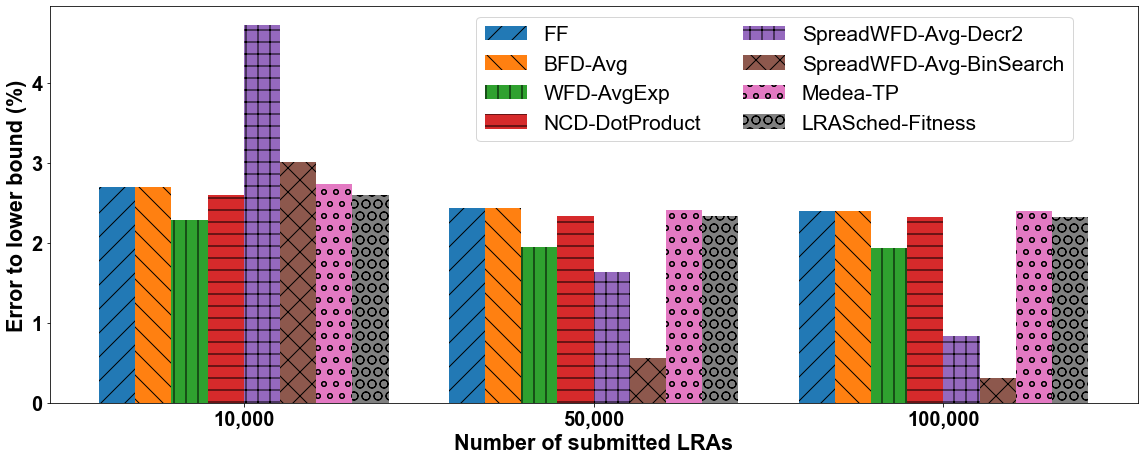

In [30]:
for c in classes: 
    #c = "arbitrary"
    legend_args={'loc':'upper right', 'anchor_x':0.95, 'anchor_y':1.0, 'ncol':2, 'fontsize':FONT_SIZE+2}
    fig = plot_barchart(twodim_eps_scale, c, df_2d_large_total_column_names, "Number of submitted LRAs",
                        'Error to lower bound (%)', legend_args)    
    filename = f"{proj_path}/plots/large2D_result_{c}.pdf" 
    fig.savefig(filename)

In [31]:
twodim_time_scale

,class,density,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,SpreadWFD-Avg,FFD-Degree,NCD-Fitness,RefineWFD-Avg-2
0,arbitrary,10000,2.0,2.3,19.0,12.5,140.3,2.0,10.9,42.0
1,arbitrary,50000,66.6,98.4,856.0,646.2,4447.4,66.6,509.3,1382.6
2,arbitrary,100000,297.7,457.6,4659.1,2703.2,24230.9,295.6,2086.6,7390.0
3,normal,10000,2.0,2.8,20.4,13.5,141.7,2.0,11.7,40.6
4,normal,50000,61.5,85.8,762.7,484.9,4969.0,61.0,355.5,1596.4
5,normal,100000,283.3,429.1,4444.2,2796.3,26052.2,275.8,2151.3,10741.4
6,threshold,10000,1.9,2.1,18.7,11.1,130.0,2.0,10.4,45.0
7,threshold,50000,51.5,72.8,593.7,336.6,4145.1,56.9,301.9,1466.0
8,threshold,100000,227.7,327.5,3355.9,1769.1,25642.5,262.1,1595.2,10791.4


In [32]:
twodim_time_scale.groupby("density").mean()

,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,SpreadWFD-Avg,FFD-Degree,NCD-Fitness,RefineWFD-Avg-2
density,,,,,,,,
10000,1.966667,2.400000,19.366667,12.366667,137.333333,2.000000,11.000000,42.533333
50000,59.866667,85.666667,737.466667,489.233333,4520.500000,61.500000,388.900000,1481.666667
100000,269.566667,404.733333,4153.066667,2422.866667,25308.533333,277.833333,1944.366667,9640.933333


In [33]:
twodim_time_scale.groupby("density").mean()/60

,FF,BFD-Avg,WFD-AvgExpo,NCD-DotProduct,SpreadWFD-Avg,FFD-Degree,NCD-Fitness,RefineWFD-Avg-2
density,,,,,,,,
10000,0.032778,0.040000,0.322778,0.206111,2.288889,0.033333,0.183333,0.708889
50000,0.997778,1.427778,12.291111,8.153889,75.341667,1.025000,6.481667,24.694444
100000,4.492778,6.745556,69.217778,40.381111,421.808889,4.630556,32.406111,160.682222


In [34]:
46000*0.019

874.0

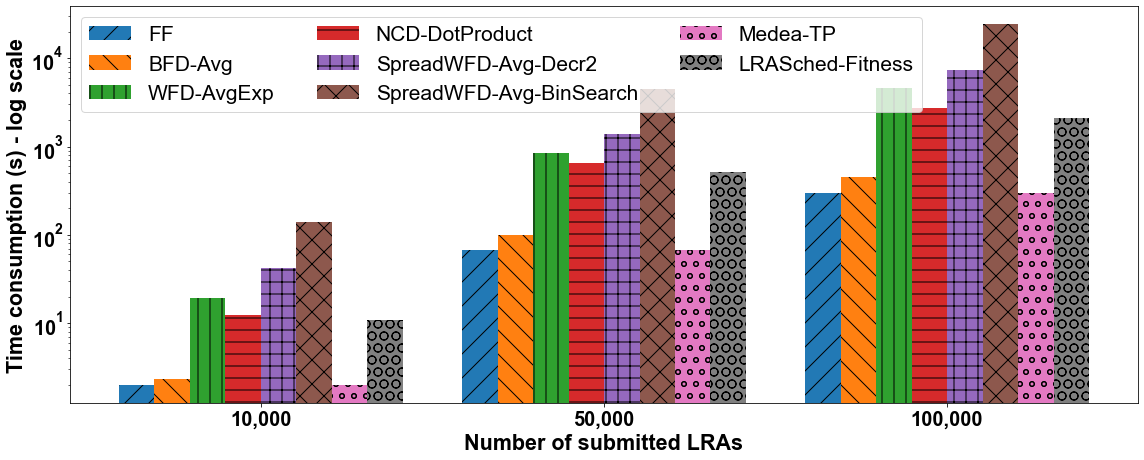

In [49]:
for c in classes: 
#c = "arbitrary"
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':3, 'fontsize':FONT_SIZE+2}
    fig = plot_barchart(twodim_time_scale, c, df_2d_large_total_column_names, "Number of submitted LRAs",
                        'Time consumption (s) - log scale', legend_args, True)
    filename = f"{proj_path}/plots/large2D_time_{c}.pdf" 
    fig.savefig(filename)

# Result-2: Time-Varying Res Request

In [36]:
df_ts = pd.read_csv(file_ts, sep='\t')
ts_eps, ts_time = get_exp_results(df_ts, df_ts_column_names)
ts_eps.columns = ['class', 'density'] + df_ts_column_names
ts_time.columns = ['class', 'density'] + df_ts_column_names

## 2.1 Impact of Affinity Density On Effectiveness and Time Consumption

In [37]:
ts_eps#.sort_values(by='density')

,class,density,FF,BFD-Avg,WFD-AvgExpo,SpreadWFD-Avg,FFD-Degree
0,arbitrary,1,10.42,9.18,8.66,2.43,10.05
1,arbitrary,5,10.25,9.21,8.82,2.63,9.93
2,arbitrary,10,10.04,9.44,9.17,3.03,9.91
3,normal,1,10.43,9.20,8.69,2.10,10.12
4,normal,5,10.27,9.24,8.82,2.62,9.89
5,normal,10,10.08,9.49,9.27,3.87,9.78
6,threshold,1,10.41,9.28,8.74,2.21,10.23
7,threshold,5,10.26,9.64,9.12,7.11,10.06
8,threshold,10,10.13,10.06,9.70,28.42,9.92


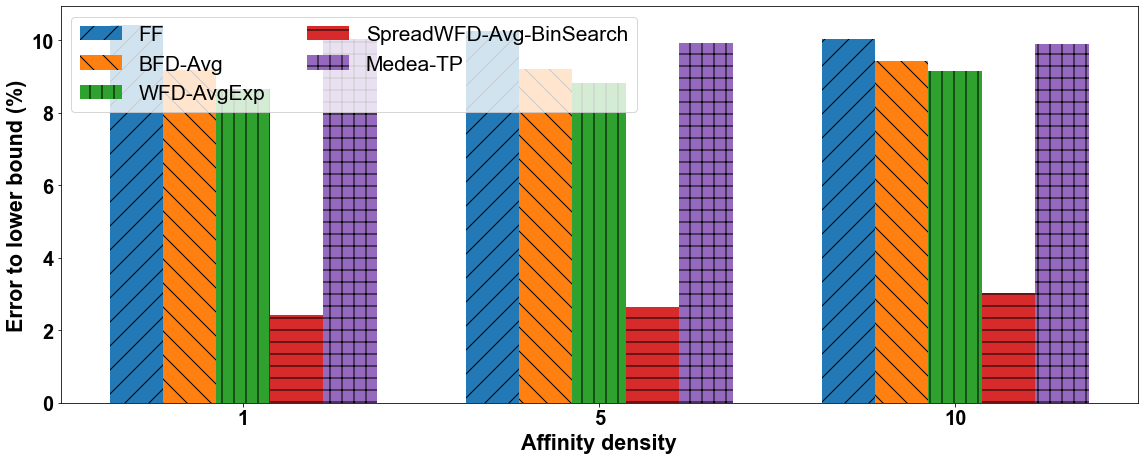

In [38]:
for c in classes: 
#c = "arbitrary"
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':2, 'fontsize':FONT_SIZE+2}
    fig = plot_barchart(ts_eps, c, df_ts_column_names, "Affinity density", 'Error to lower bound (%)', legend_args)
    filename = f"{proj_path}/plots/densityTS_result_{c}.pdf" 
    fig.savefig(filename)

In [39]:
ts_time.sort_values(by='density')

,class,density,FF,BFD-Avg,WFD-AvgExpo,SpreadWFD-Avg,FFD-Degree
0,arbitrary,1,7.4,11.1,171.5,252.5,7.2
3,normal,1,9.0,13.0,182.8,250.6,8.5
6,threshold,1,8.3,12.4,170.2,218.2,9.2
1,arbitrary,5,22.0,27.5,240.9,595.8,21.9
4,normal,5,23.3,29.9,255.0,619.3,22.3
7,threshold,5,21.4,27.0,228.7,535.5,38.2
2,arbitrary,10,38.5,44.5,239.6,1124.7,38.2
5,normal,10,39.0,45.2,247.5,1134.9,38.9
8,threshold,10,37.4,42.9,239.8,1989.8,97.6


In [40]:
ts_time.groupby('density').mean()

,FF,BFD-Avg,WFD-AvgExpo,SpreadWFD-Avg,FFD-Degree
density,,,,,
1,8.233333,12.166667,174.833333,240.433333,8.300000
5,22.233333,28.133333,241.533333,583.533333,27.466667
10,38.300000,44.200000,242.300000,1416.466667,58.233333


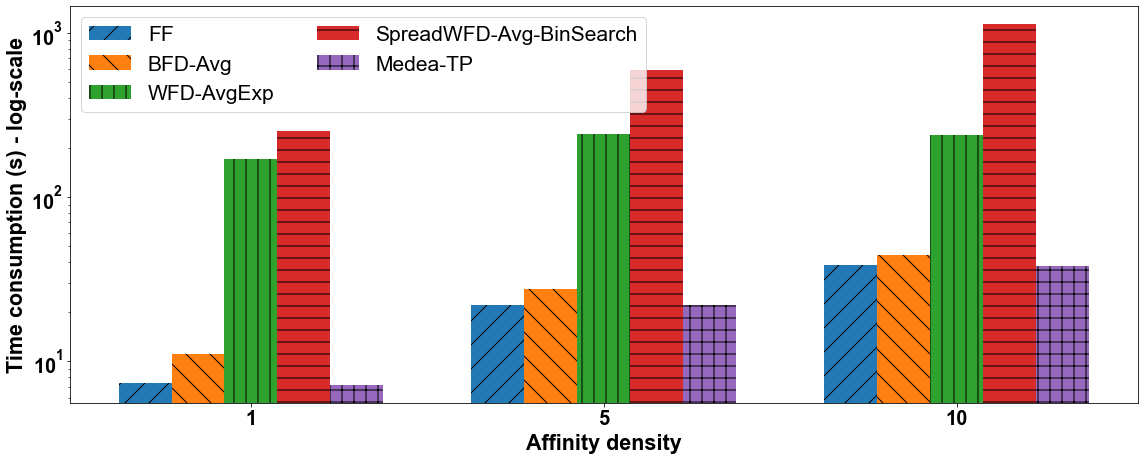

In [41]:
for c in classes: 
#c = "arbitrary"
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':2, 'fontsize':FONT_SIZE+2}

    fig = plot_barchart(ts_time, c, df_ts_column_names, "Affinity density", 'Time consumption (s) - log-scale', legend_args, True)

    filename = f"{proj_path}/plots/densityTS_time_{c}.pdf" 
    fig.savefig(filename)

## 2.2 Impact of LRA Submission Scale On Effectiveness and Time Consumption

In [42]:
df_large_ts = pd.read_csv(file_largeTS, sep='\t') ## df_TS_large

ts_eps_scale, ts_time_scale = get_scale_exp_results(df_large_ts, df_ts_large_column_names)
ts_eps_scale.columns = ['class', 'density'] + df_ts_large_column_names
ts_time_scale.columns = ['class', 'density'] + df_ts_large_column_names

In [43]:
ts_eps_scale#[ts_eps_scale['class'] == 'arbitrary'].sort_values(by='density')

,class,density,FF,BFD-Avg,WFD-AvgExpo,FFD-Degree
0,arbitrary,10000,5.35,4.86,4.66,5.34
1,arbitrary,50000,5.93,5.66,5.59,5.96
2,arbitrary,100000,6.11,5.93,5.82,6.10
3,normal,10000,5.35,4.87,4.71,5.32
4,normal,50000,5.93,5.68,5.61,5.95
5,normal,100000,6.11,5.92,5.82,6.03
6,threshold,10000,5.34,4.85,4.68,5.39
7,threshold,50000,5.93,5.68,5.61,5.94
8,threshold,100000,6.13,5.93,5.82,6.09


In [44]:
ts_eps_scale.mean()

/var/folders/9p/y1zkb7yx02v6q97sf_2f80n40000gn/T/ipykernel_3025/854004541.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ts_eps_scale.mean()


density        53333.333333
FF                 5.797778
BFD-Avg            5.486667
WFD-AvgExpo        5.368889
FFD-Degree         5.791111
dtype: float64

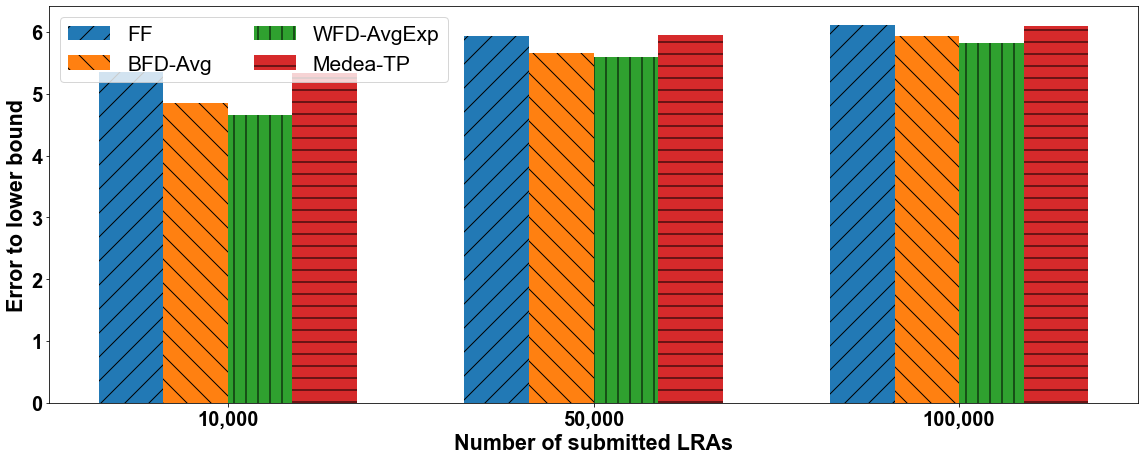

In [45]:
for c in classes: 
#c = "arbitrary"
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':2, 'fontsize':FONT_SIZE+2}

    fig = plot_barchart(ts_eps_scale, c, df_ts_large_column_names, "Number of submitted LRAs", 'Error to lower bound', legend_args)    
    filename = f"{proj_path}/plots/largeTS_result_{c}.pdf" 
    fig.savefig(filename)

In [46]:
ts_time_scale

,class,density,FF,BFD-Avg,WFD-AvgExpo,FFD-Degree
0,arbitrary,10000,5.3,6.1,155.5,5.0
1,arbitrary,50000,260.3,326.9,5392.5,259.7
2,arbitrary,100000,832.0,1090.7,17492.6,829.2
3,normal,10000,5.4,6.4,169.8,5.3
4,normal,50000,150.5,194.0,3403.4,151.3
5,normal,100000,803.0,1067.1,18373.9,790.0
6,threshold,10000,5.3,5.7,162.9,5.2
7,threshold,50000,135.3,165.7,3425.9,136.4
8,threshold,100000,609.6,765.9,14807.8,641.6


In [47]:
ts_time_scale.groupby('density').mean()

,FF,BFD-Avg,WFD-AvgExpo,FFD-Degree
density,,,,
10000,5.333333,6.066667,162.733333,5.166667
50000,182.033333,228.866667,4073.933333,182.466667
100000,748.200000,974.566667,16891.433333,753.600000


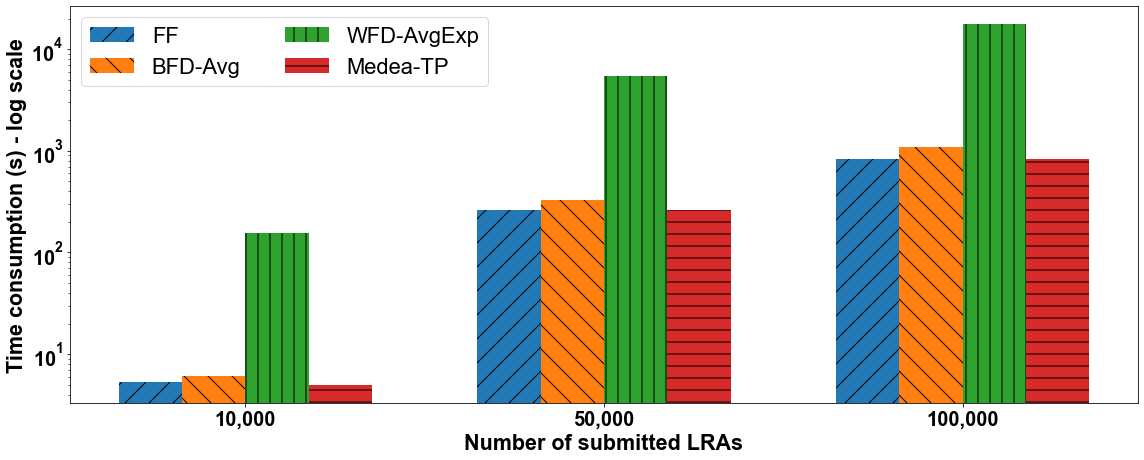

In [48]:
for c in classes: 
#c = "arbitrary"    
    legend_args={'loc':'upper left', 'anchor_x':0.0, 'anchor_y':1, 'ncol':2, 'fontsize':FONT_SIZE+3}
    fig = plot_barchart(ts_time_scale, c, df_ts_large_column_names, "Number of submitted LRAs",
                        'Time consumption (s) - log scale', legend_args, True)

    filename = f"{proj_path}/plots/largeTS_time_{c}.pdf" 
    fig.savefig(filename)